In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pingouin import ancova, ttest

matplotlib.rcParams['svg.fonttype'] = 'none'

In [2]:
#Upload Data
data = pd.read_csv('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/data/obese_mice_data.csv')

In [3]:
pd.options.display.max_columns = 100
#separate by tumor types
e0771 = data[data['Model'] == 'E0771']
#separate by individual experiments
prehab_e0771 = e0771.iloc[:10] #Study 1
acute_e0771 = e0771.iloc[10:] #Study 2

mmtv_pymt = data[data['Model'] == 'MMTV-PyMT'] #Study 3

yummer = data[data['Model'] == 'YUMMER']
#separate by individual experiments
yummer_prehab = yummer.iloc[:12] #Study 4
yummer_rehab = yummer.iloc[12:] #Study 5

# Acute E0771 Analyses (Study 1/5)

In [4]:
#Drop columns with no data
acute_e0771 = acute_e0771.dropna(axis=1)
#Make long for plotting
acute_melt = acute_e0771.melt(id_vars=['Mouse#', 'Model', 'Group'])

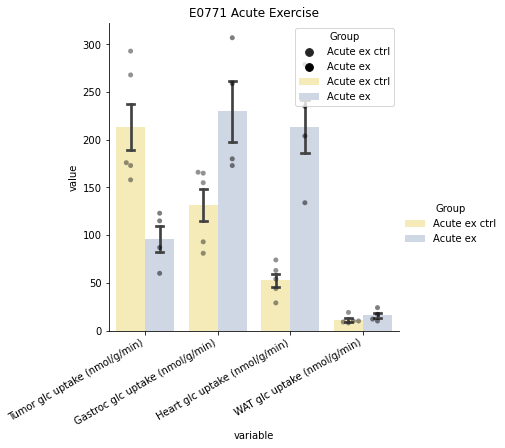

In [5]:
g = sns.catplot(data=acute_melt, x='variable', y='value', hue='Group', kind='bar', ci=68, capsize=0.1, palette='Pastel2_r').set(title='E0771 Acute Exercise')
sns.swarmplot(x="variable", y="value", hue='Group', data=acute_melt, color="0", dodge=True, alpha=.5)
g.set_xticklabels(rotation=30, ha='right')

plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/obesity_studies/e0771_acute_2dg.svg', dpi=300, bbox_inches='tight')

Tumor ttest

In [6]:
x = acute_e0771[['Group', 'Tumor glc uptake (nmol/g/min)']]
a = x[x['Group'] == 'Acute ex ctrl']['Tumor glc uptake (nmol/g/min)'].tolist()
b = x[x['Group'] == 'Acute ex']['Tumor glc uptake (nmol/g/min)'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.755469,5.861974,two-sided,0.009863,"[40.45, 194.25]",2.321669,6.523,0.841828


Gastroc ttest

In [7]:
x = acute_e0771[['Group', 'Gastroc glc uptake (nmol/g/min)']]
a = x[x['Group'] == 'Acute ex ctrl']['Gastroc glc uptake (nmol/g/min)'].tolist()
b = x[x['Group'] == 'Acute ex']['Gastroc glc uptake (nmol/g/min)'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.62372,4.90863,two-sided,0.047741,"[-194.06, -1.44]",1.856094,2.366,0.662054


Heart ttest

In [8]:
x = acute_e0771[['Group', 'Heart glc uptake (nmol/g/min)']]
a = x[x['Group'] == 'Acute ex ctrl']['Heart glc uptake (nmol/g/min)'].tolist()
b = x[x['Group'] == 'Acute ex']['Heart glc uptake (nmol/g/min)'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.091216,3.388545,two-sided,0.010823,"[-254.15, -66.25]",3.81231,20.542,0.997757


WAT ttest

In [9]:
x = acute_e0771[['Group', 'WAT glc uptake (nmol/g/min)']]
a = x[x['Group'] == 'Acute ex ctrl']['WAT glc uptake (nmol/g/min)'].tolist()
b = x[x['Group'] == 'Acute ex']['WAT glc uptake (nmol/g/min)'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.230666,5.273204,two-sided,0.270501,"[-13.91, 4.81]",0.860858,0.78,0.199557


# prehab_e0771 Analyses (Study 2/5)

In [10]:
prehab_e0771 = prehab_e0771.dropna(axis=1)

#Make list of tumor size for statistics
prehab_e0771_tumors = prehab_e0771['Wk 4 tumor volume (mm3)'].tolist()
prehab_e0771_insulin = prehab_e0771['Plasma insulin (uU/mL)'].tolist()
prehab_e0771_glucose = prehab_e0771['Plasma glucose (mg/dL)'].tolist()
prehab_e0771_weight = prehab_e0771['BW (g) at infusion study'].tolist()
prehab_e0771_fat = prehab_e0771['Fat mass (g) week 3 prior to surgery'].tolist()
prehab_e0771_lean = prehab_e0771['Lean mass (g) wk 3 prior to surgery'].tolist()

HOMA_IR Calculation is:

(Insulin (uU/mL) * Glucose (mmol/L)) / 22.5

Convert measured blood glucose from mg/dl to mmol/l by multiplying by .0555

In [11]:
prehab_e0771['HOMA_IR'] = (prehab_e0771['Plasma insulin (uU/mL)'] * (prehab_e0771['Plasma glucose (mg/dL)']*0.0555)) / 22.5
prehab_e0771_HOMA = prehab_e0771['HOMA_IR'].tolist()

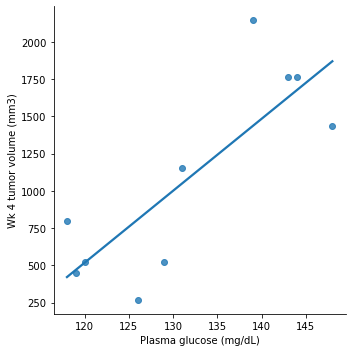

In [11]:
sns.lmplot(data=prehab_e0771, x='Plasma glucose (mg/dL)', y='Wk 4 tumor volume (mm3)', ci=None)
plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/obesity_studies/glucose_vs_tumorsize.svg', dpi=300, bbox_inches='tight')

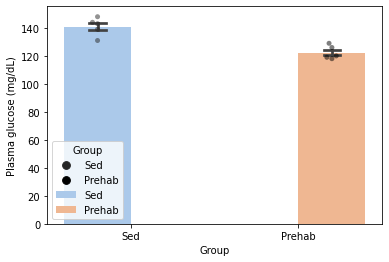

In [13]:
sns.barplot(data=prehab_e0771, x='Group', y='Plasma glucose (mg/dL)', hue='Group', ci=68, capsize=0.1, palette='pastel')
sns.swarmplot(x="Group", y="Plasma glucose (mg/dL)", hue='Group', data=prehab_e0771, color="0", dodge=True, alpha=.5)
plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/Glucose_vs_tumorsize_bar.svg', dpi=300, bbox_inches='tight')

In [12]:
stats.linregress(prehab_e0771_glucose, prehab_e0771_tumors)

LinregressResult(slope=48.27695625817098, intercept=-5275.965762531117, rvalue=0.8130665611478131, pvalue=0.004234741120066788, stderr=12.221349362078376, intercept_stderr=1614.7589365254232)

In [13]:
ttest(prehab_e0771[prehab_e0771['Group'] == 'Prehab']['Plasma glucose (mg/dL)'].tolist(), prehab_e0771[prehab_e0771['Group'] == 'Sed']['Plasma glucose (mg/dL)'].tolist())

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.166667,8,two-sided,0.000857,"[-26.9, -10.3]",3.267687,30.706,0.99416


In [14]:
ancova(data=prehab_e0771, dv='Wk 4 tumor volume (mm3)', covar='HOMA_IR', between='Group')

,Source,SS,DF,F,p-unc,np2
0,Group,1.187813e+06,1,16.452978,0.004833,0.701530
1,HOMA_IR,2.057145e+05,1,2.849452,0.135261,0.289301
2,Residual,5.053610e+05,7,NaN,NaN,NaN


In [ ]:
sns.lmplot(data=prehab_e0771, x='Plasma insulin (uU/mL)', y='Wk 4 tumor volume (mm3)', ci=None)
plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/Insulin_vs_tumorsize.svg', dpi=300, bbox_inches='tight')

In [ ]:
sns.lmplot(data=prehab_e0771, x='Plasma insulin (uU/mL)', y='Wk 4 tumor volume (mm3)', hue='Group', ci=None)
plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/Insulin_vs_tumorsize_grouped.svg', dpi=300, bbox_inches='tight')

In [ ]:
stats.linregress(prehab_e0771_insulin, prehab_e0771_tumors)

In [ ]:
stats.linregress(prehab_e0771[prehab_e0771['Group'] == 'Prehab']['Plasma insulin (uU/mL)'].tolist(), prehab_e0771[prehab_e0771['Group'] == 'Prehab']['Wk 4 tumor volume (mm3)'].tolist())

In [35]:
ancova(data=prehab_e0771, dv='Wk 4 tumor volume (mm3)', covar='Plasma insulin (uU/mL)', between='Group')

,Source,SS,DF,F,p-unc,np2
0,Group,1.363022e+06,1,19.645015,0.003036,0.737287
1,Plasma insulin (uU/mL),2.253973e+05,1,3.248614,0.114483,0.316981
2,Residual,4.856783e+05,7,NaN,NaN,NaN


In [ ]:
sns.barplot(data=prehab_e0771, x='Group', y='Plasma insulin (uU/mL)', hue='Group', ci=68, capsize=0.1, palette='pastel')
sns.swarmplot(x="Group", y="Plasma insulin (uU/mL)", hue='Group', data=prehab_e0771, color="0", dodge=True, alpha=.5)
plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/Insulin_vs_tumorsize_bar.svg', dpi=300, bbox_inches='tight')

In [ ]:
ttest(prehab_e0771[prehab_e0771['Group'] == 'Prehab']['Plasma insulin (uU/mL)'].tolist(), prehab_e0771[prehab_e0771['Group'] == 'Sed']['Plasma insulin (uU/mL)'].tolist())

In [ ]:
sns.lmplot(data=prehab_e0771, x='HOMA_IR', y='Wk 4 tumor volume (mm3)', hue='Group')
#plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/VO2peak_vs_maxSpeed.svg', dpi=300, bbox_inches='tight')

In [ ]:
stats.linregress(prehab_e0771_HOMA, prehab_e0771_tumors)

In [16]:
stats.linregress(prehab_e0771_fat, prehab_e0771_tumors)

LinregressResult(slope=189.43107672792235, intercept=-2905.4147884527656, rvalue=0.9110385294627341, pvalue=0.000245839912302082, stderr=30.311343630484274, intercept_stderr=644.6197367250151)

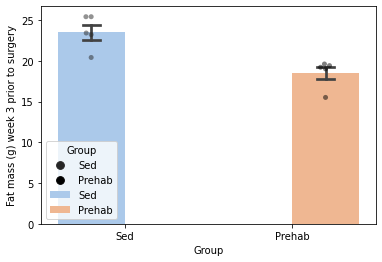

In [17]:
sns.barplot(data=prehab_e0771, x='Group', y='Fat mass (g) week 3 prior to surgery', hue='Group', ci=68, capsize=0.1, palette='pastel')
sns.swarmplot(x="Group", y="Fat mass (g) week 3 prior to surgery", hue='Group', data=prehab_e0771, color="0", dodge=True, alpha=.5)
plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/obesity_studies/fat_vs_tumorsize_bar.svg', dpi=300, bbox_inches='tight')

In [20]:
ttest(prehab_e0771[prehab_e0771['Group'] == 'Prehab']['Fat mass (g) week 3 prior to surgery'].tolist(), prehab_e0771[prehab_e0771['Group'] == 'Sed']['Fat mass (g) week 3 prior to surgery'].tolist())

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-4.193246,8,two-sided,0.003024,"[-7.78, -2.26]",2.652041,12.038,0.954797


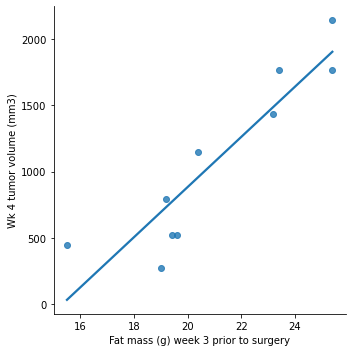

In [18]:
sns.lmplot(data=prehab_e0771, x='Fat mass (g) week 3 prior to surgery', y='Wk 4 tumor volume (mm3)', ci=None)
plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/obesity_studies/fat_vs_tumorsize.svg', dpi=300, bbox_inches='tight')

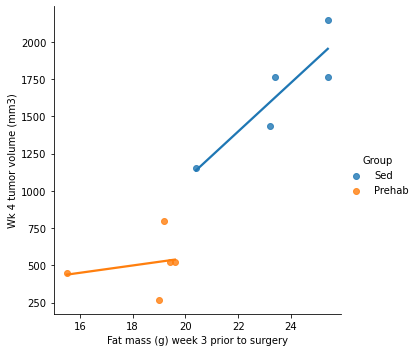

In [19]:
sns.lmplot(data=prehab_e0771, x='Fat mass (g) week 3 prior to surgery', y='Wk 4 tumor volume (mm3)', ci=None, hue='Group')
plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/obesity_studies/fat_vs_tumorsize_grouped.svg', dpi=300, bbox_inches='tight')

In [32]:
ancova(data=prehab_e0771, dv='Wk 3 tumor volume (mm3)', covar='Fat mass (g) week 3 prior to surgery', between='Group')

,Source,SS,DF,F,p-unc,np2
0,Group,68843.021434,1,0.699824,0.430472,0.090888
1,Fat mass (g) week 3 prior to surgery,40117.340338,1,0.407813,0.543402,0.055052
2,Residual,688603.456242,7,NaN,NaN,NaN


In [ ]:
sns.catplot(data=tumors_long, x='variable', y='value', hue='Group', ci=68, palette='pastel', hue_order=['Sed', 'Prehab'], kind="point", capsize=0.1)
plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/obesity_studies/e0771_tumorcurve.svg', bbox_inches='tight', dpi=300)

In [37]:
tumor_size = prehab_e0771[['Mouse#', 'Group','Wk 0 tumor volume (mm3)', 'Wk 1 tumor volume (mm3)', 'Wk 2 tumor volume (mm3)', 'Wk 3 tumor volume (mm3)', 'Wk 4 tumor volume (mm3)']]
tumors_long = tumor_size.melt(id_vars=['Mouse#', 'Group'])

In [38]:
sed_tumor = tumor_size[tumor_size['Group'] == 'Sed']
ex_tumor = tumor_size[tumor_size['Group'] == 'Prehab']

In [39]:
ttest(ex_tumor['Wk 2 tumor volume (mm3)'].tolist(), sed_tumor['Wk 2 tumor volume (mm3)'].tolist())

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.47115,8,two-sided,0.179458,"[-205.71, 45.47]",0.930437,0.909,0.254624


In [40]:
ttest(ex_tumor['Wk 3 tumor volume (mm3)'].tolist(), sed_tumor['Wk 3 tumor volume (mm3)'].tolist())

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.538498,8,two-sided,0.034792,"[-924.73, -44.38]",1.605487,2.322,0.605983


In [41]:
ttest(ex_tumor['Wk 4 tumor volume (mm3)'].tolist(), sed_tumor['Wk 4 tumor volume (mm3)'].tolist())

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-6.048706,8,two-sided,0.000306,"[-1575.34, -705.71]",3.825538,68.113,0.999456


In [42]:
prehab_e0771_vpdhcs = prehab_e0771[['Group', 'Tumor Vpdh/Vcs', 'Heart Vpdh/Vcs', 'Gastroc Vpdh/Vcs']]

In [43]:
prehab_e0771_vpdhcs_melt = prehab_e0771_vpdhcs.melt(id_vars=['Group'])

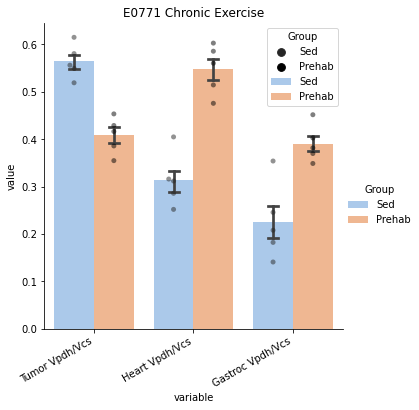

In [44]:
g = sns.catplot(data=prehab_e0771_vpdhcs_melt, x='variable', y='value', hue='Group', kind='bar', ci=68, capsize=0.1, palette='pastel').set(title='E0771 Chronic Exercise')
sns.swarmplot(x="variable", y="value", hue='Group', data=prehab_e0771_vpdhcs_melt, color="0", dodge=True, alpha=.5)
g.set_xticklabels(rotation=30, ha='right')

#plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/obesity_studies/e0771_chronic_vpdhcs.svg', dpi=300, bbox_inches='tight')

In [48]:
sed_vpdh = prehab_e0771_vpdhcs[prehab_e0771_vpdhcs['Group'] == 'Sed']
ex_vpdh = prehab_e0771_vpdhcs[prehab_e0771_vpdhcs['Group'] == 'Prehab']

In [52]:
ttest(sed_vpdh['Heart Vpdh/Vcs'].tolist(), ex_vpdh['Heart Vpdh/Vcs'].tolist())

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-6.772954,8,two-sided,0.000142,"[-0.31, -0.15]",4.283592,125.782,0.999947


In [53]:
dg = prehab_e0771[['Group','Tumor glc uptake (nmol/g/min)', 'Gastroc glc uptake (nmol/g/min)', 'Heart glc uptake (nmol/g/min)', 'WAT glc uptake (nmol/g/min)']]

In [54]:
sed_dg = dg[dg['Group'] == 'Sed']
ex_dg = dg[dg['Group'] == 'Prehab']

In [59]:
ttest(sed_dg['WAT glc uptake (nmol/g/min)'].tolist(), ex_dg['WAT glc uptake (nmol/g/min)'].tolist())

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.068199,8,two-sided,0.947301,"[-6.96, 6.56]",0.043133,0.493,0.050419


In [ ]:
dg.melt(id_vars=['Group'])

In [ ]:
g = sns.catplot(data=dg.melt(id_vars=['Group']), x='variable', y='value', hue='Group', kind='bar', ci=68, capsize=0.1, palette='pastel').set(title='E0771 Chronic Exercise')
sns.swarmplot(x="variable", y="value", hue='Group', data=dg.melt(id_vars=['Group']), color="0", dodge=True, alpha=.5)
g.set_xticklabels(rotation=30, ha='right')

plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/obesity_studies/e0771_chronic_2dg.svg', dpi=300, bbox_inches='tight')

# MMTV_PyMT Analyses (Study 3/5)

In [15]:
mmtv_pymt = mmtv_pymt.dropna(axis=1, how='all')

In [16]:
mmtv_pymt_tumors = mmtv_pymt[['Group', 'Wk 0 tumor volume (mm3)', 'Wk 1 tumor volume (mm3)', 'Wk 2 tumor volume (mm3)', 'Wk 3 tumor volume (mm3)']]
mmtv_pymt_tumors_long = mmtv_pymt_tumors.melt(id_vars='Group')

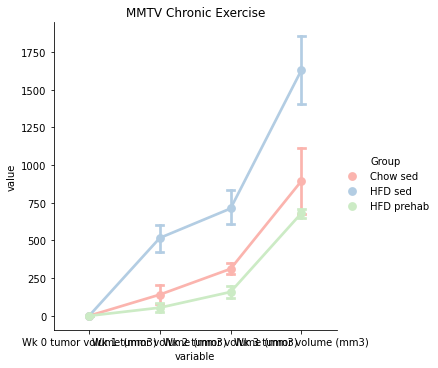

In [90]:
sns.catplot(data=mmtv_pymt_tumors_long, x='variable', y='value', hue='Group', ci=68, palette='Pastel1', hue_order=['Chow sed', 'HFD sed', 'HFD prehab'], kind="point", capsize=0.1).set(title='MMTV Chronic Exercise')
plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/obesity_studies/mmtv_tumorcurve.svg', bbox_inches='tight', dpi=300)

In [17]:
cd_tumor = mmtv_pymt_tumors[mmtv_pymt_tumors['Group'] == 'Chow sed']
hfd_tumor = mmtv_pymt_tumors[mmtv_pymt_tumors['Group'] == 'HFD sed']
hfd_ex_tumor = mmtv_pymt_tumors[mmtv_pymt_tumors['Group'] == 'HFD prehab']

In [18]:
mmtv_pymt_dg = mmtv_pymt[['Group', 'Tumor glc uptake (nmol/g/min)', 'Gastroc glc uptake (nmol/g/min)', 'Heart glc uptake (nmol/g/min)', 'WAT glc uptake (nmol/g/min)']]
mmtv_pymt_dg_long = mmtv_pymt_dg.melt(id_vars='Group')

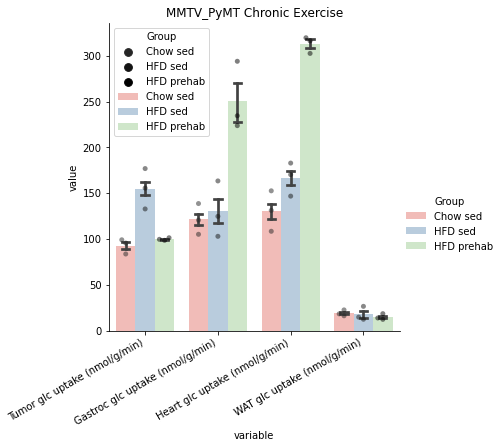

In [97]:
g = sns.catplot(data=mmtv_pymt_dg_long, x='variable', y='value', hue='Group', kind='bar', ci=68, capsize=0.1, palette='Pastel1').set(title='MMTV_PyMT Chronic Exercise')
sns.swarmplot(x="variable", y="value", hue='Group', data=mmtv_pymt_dg_long, color="0", dodge=True, alpha=.5)
g.set_xticklabels(rotation=30, ha='right')

plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/obesity_studies/mmtv_chronic_2dg.svg', dpi=300, bbox_inches='tight')

In [19]:
mmtv_body = mmtv_pymt[['Group', 'Plasma glucose (mg/dL)', 'Plasma insulin (uU/mL)', 'BW (g) at infusion study']]

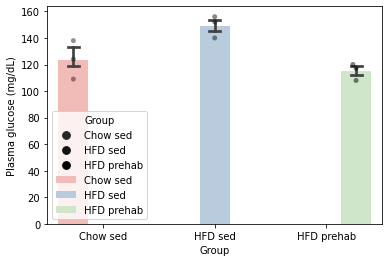

In [109]:
sns.barplot(data=mmtv_body, x='Group', y='Plasma glucose (mg/dL)', hue='Group', ci=68, capsize=0.1, palette='Pastel1')
sns.swarmplot(x="Group", y="Plasma glucose (mg/dL)", hue='Group', data=mmtv_body, color="0", dodge=True, alpha=.5)
plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/obesity_studies/mmtv_glucose.svg', dpi=300, bbox_inches='tight')

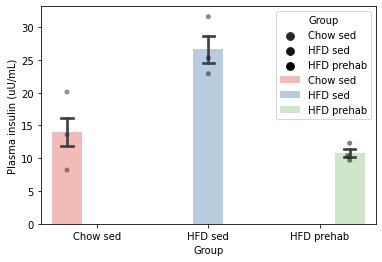

In [110]:
sns.barplot(data=mmtv_body, x='Group', y='Plasma insulin (uU/mL)', hue='Group', ci=68, capsize=0.1, palette='Pastel1')
sns.swarmplot(x="Group", y="Plasma insulin (uU/mL)", hue='Group', data=mmtv_body, color="0", dodge=True, alpha=.5)
plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/obesity_studies/mmtv_insulin.svg', dpi=300, bbox_inches='tight')

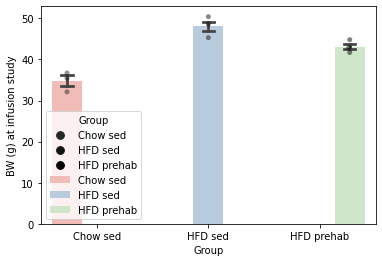

In [111]:
sns.barplot(data=mmtv_body, x='Group', y='BW (g) at infusion study', hue='Group', ci=68, capsize=0.1, palette='Pastel1')
sns.swarmplot(x="Group", y="BW (g) at infusion study", hue='Group', data=mmtv_body, color="0", dodge=True, alpha=.5)
plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/obesity_studies/mmtv_weight.svg', dpi=300, bbox_inches='tight')

# Yummer Prehab Analyses (Study 4/5)

In [21]:
yummer_prehab

,Mouse#,Model,Group,Tumor m1 pyr,Tumor m2 pyr,Tumor m3 pyr,Tumor m1 lac,Tumor m2 lac,Tumor m3 lac,Tumor m1 ala,Tumor m2 ala,Tumor m3 ala,Tumor m1 glc,Tumor m2 glc,Tumor m3 glc,Tumor m4 glc,Tumor m5 glc,Tumor m6 glc,Tumor m5 glut,Tumor C4C5 m2 glut,Tumor Vpdh/Vcs,Tumor m3 pyr/m6 glc,Unnamed: 22,Heart m1 pyr,Heart m2 pyr,Heart m3 pyr,Heart m1 lac,Heart m2 lac,Heart m3 lac,Heart m1 ala,Heart m2 ala,Heart m3 ala,Heart m1 glc,Heart m2 glc,Heart m3 glc,Heart m4 glc,Heart m5 glc,Heart m6 glc,Heart m5 glut,Heart C4C5 m2 glut,Heart Vpdh/Vcs,Heart m3 pyr/m6 glc,Unnamed: 42,Gastroc m1 pyr,Gastroc m2 pyr,Gastroc m3 pyr,Gastroc m1 lac,Gastroc m2 lac,Gastroc m3 lac,Gastroc m1 ala,Gastroc m2 ala,Gastroc m3 ala,Gastroc m1 glc,Gastroc m2 glc,Gastroc m3 glc,Gastroc m4 glc,Gastroc m5 glc,Gastroc m6 glc,Gastroc m5 glut,Gastroc C4C5 m2 glut,Gastroc Vpdh/Vcs,Gastroc m3 pyr/m6 glc,Unnamed: 62,WAT m1 pyr,WAT m2 pyr,WAT m3 pyr,WAT m1 lac,WAT m2 lac,WAT m3 lac,WAT m1 ala,WAT m2 ala,WAT m3 ala,WAT m1 glc,WAT m2 glc,WAT m3 glc,WAT m4 glc,WAT m5 glc,WAT m6 glc,WAT m5 glut,WAT C4C5 m2 glut,WAT Vpdh/Vcs,WAT m3 pyr/m6 glc,Unnamed: 82,Wk 0 tumor volume (mm3),Wk 1 tumor volume (mm3),Wk 2 tumor volume (mm3),Wk 3 tumor volume (mm3),Wk 4 tumor volume (mm3),Unnamed: 88,Tumor glc uptake (nmol/g/min),Tumor glc uptake (nmol/min),Gastroc glc uptake (nmol/g/min),Heart glc uptake (nmol/g/min),WAT glc uptake (nmol/g/min),Leukocyte glc uptake (nmol/10^5 cells/min),Plasma glucose (mg/dL),Plasma insulin (uU/mL),Lean mass (g) wk 3 prior to surgery,Fat mass (g) week 3 prior to surgery,BW (g) at infusion study
10,1,YUMMER,Prehab,0.99,0.85,2.71,0.85,0.63,2.32,0.83,0.51,2.31,3.96,3.97,5.70,2.50,2.40,9.60,1.96,0.620,0.228782,0.282292,NaN,2.89,2.67,3.63,2.73,2.34,3.04,2.80,2.26,3.56,1.97,1.41,3.60,1.96,1.02,10.35,1.92,0.865,0.238292,0.350725,NaN,2.16,1.08,3.91,1.21,0.61,2.04,1.26,0.82,2.12,3.11,3.04,3.20,1.75,2.75,8.86,2.36,0.790,0.202046,0.441309,NaN,0.42,2.81,0.99,0.97,2.78,0.88,0.91,2.86,0.88,1.65,2.24,5.62,2.08,2.18,8.26,0.86,0.190,0.191919,0.119855,NaN,0.0,0.0,14.130000,220.78130,696.5567,NaN,88.3,61.505957,141.2,149.6,15.5,55.8,144.0,NaN,26.83,18.18,53.4
11,2,YUMMER,Sed,0.85,0.96,1.37,0.92,1.03,1.26,0.99,0.86,1.45,3.95,2.50,4.72,1.37,1.20,3.02,1.53,0.460,0.335766,0.453642,NaN,1.51,2.54,2.44,1.53,2.24,2.16,1.64,2.45,2.09,3.00,3.28,2.90,1.93,2.67,13.44,1.46,0.570,0.233607,0.181548,NaN,2.71,3.07,3.25,2.84,2.95,2.33,2.51,2.54,2.36,1.02,2.74,2.20,2.59,1.74,14.05,2.18,0.610,0.187692,0.231317,NaN,0.18,0.26,0.64,0.74,0.83,0.93,0.78,0.79,1.02,2.49,3.81,5.19,1.65,1.59,6.44,1.15,0.120,0.187500,0.099379,NaN,0.0,0.0,65.416670,904.32000,2571.1370,NaN,112.4,288.995799,156.8,135.6,18.6,13.1,147.0,NaN,20.31,22.49,50.8
12,3,YUMMER,Prehab,1.39,0.88,3.87,1.21,0.91,3.82,1.18,0.82,3.96,2.13,3.41,5.11,1.04,1.69,17.52,1.49,0.710,0.183463,0.220890,NaN,1.98,2.31,3.26,2.14,1.96,3.04,2.19,2.13,2.83,2.39,1.58,2.21,1.54,1.46,8.76,2.07,0.980,0.300613,0.372146,NaN,3.17,1.03,3.10,1.58,0.82,2.64,1.42,0.91,2.58,2.17,1.56,3.04,2.65,2.74,6.80,2.26,0.670,0.216129,0.455882,NaN,0.24,0.66,0.47,0.82,0.40,0.35,0.91,0.46,0.31,1.87,1.70,4.56,2.56,2.82,5.17,0.96,0.110,0.234043,0.090909,NaN,0.0,0.0,47.688750,523.33330,904.3200,NaN,96.7,87.447744,130.8,158.3,11.6,41.7,130.0,NaN,24.26,17.63,49.6
13,4,YUMMER,Sed,1.40,1.42,1.51,1.22,0.64,0.59,1.10,0.71,0.61,3.62,3.26,5.22,1.92,1.89,3.88,1.68,0.480,0.317881,0.389175,NaN,2.26,1.62,4.20,2.22,1.84,3.45,1.58,1.53,3.37,1.45,3.35,4.38,1.71,2.57,49.08,1.88,0.780,0.185714,0.085575,NaN,0.86,1.67,6.61,1.29,1.37,4.20,1.36,1.54,4.14,1.69,3.74,5.08,2.81,1.81,25.61,2.51,0.700,0.105900,0.258102,NaN,0.39,0.57,1.35,0.82,0.96,0.87,0.80,1.03,0.82,2.30,2.55,5.73,2.25,2.64,10.94,1.22,0.210,0.155556,0.123400,NaN,0.0,0.0,143.720400,605.82380,1436.0270,NaN,158.3,227.323074,103.7,104.0,10.3,34.6,148.0,NaN,23.36,18.66,51.7
14,5,YUMMER,Prehab,1.97,2.95,2.37,1.18,1.84,1.97,1.22,1.75,1.83,2.14,2.60,4.04,2.70,2.24,9.92,1.78,0.655,0.276371,0.238911,NaN,3.05,1.56,2.50,2.11,1.36,2.11,1.82,1.28,2.18,1.14,2.37

In [22]:
yummer_prehab_tumors = yummer_prehab[['Group', 'Wk 0 tumor volume (mm3)', 'Wk 1 tumor volume (mm3)', 'Wk 2 tumor volume (mm3)', 'Wk 3 tumor volume (mm3)', 'Wk 4 tumor volume (mm3)']]
yummer_prehab_tumors_long = yummer_prehab_tumors.melt(id_vars='Group')

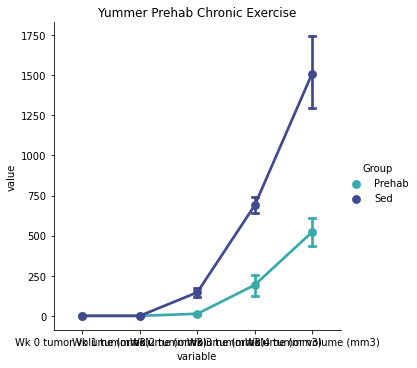

In [25]:
sns.catplot(data=yummer_prehab_tumors_long, x='variable', y='value', hue='Group', ci=68, palette='mako_r', hue_order=['Prehab', 'Sed'], kind="point", capsize=0.1).set(title='Yummer Prehab Chronic Exercise')
plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/obesity_studies/yummer_prehab_tumorcurve.svg', bbox_inches='tight', dpi=300)

In [26]:
yummer_prehab_dg = yummer_prehab[['Group', 'Tumor glc uptake (nmol/g/min)', 'Gastroc glc uptake (nmol/g/min)', 'Heart glc uptake (nmol/g/min)', 'WAT glc uptake (nmol/g/min)']]
yummer_prehab_dg_long = yummer_prehab_dg.melt(id_vars='Group')

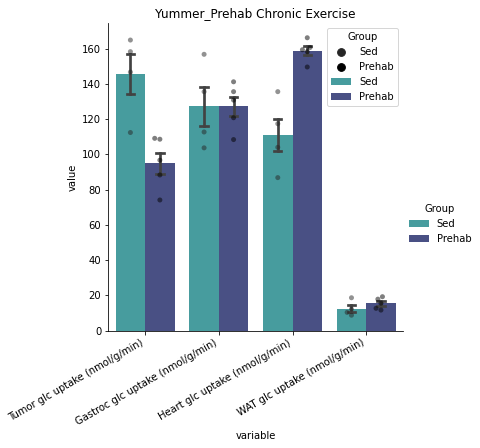

In [30]:
g = sns.catplot(data=yummer_prehab_dg_long, x='variable', y='value', hue='Group', kind='bar', hue_order=['Sed', 'Prehab'], ci=68, capsize=0.1, palette='mako_r').set(title='Yummer_Prehab Chronic Exercise')
sns.swarmplot(x="variable", y="value", hue='Group', hue_order=['Sed', 'Prehab'], data=yummer_prehab_dg_long, color="0", dodge=True, alpha=.5)
g.set_xticklabels(rotation=30, ha='right')

plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/obesity_studies/yummer_prehab_chronic_2dg.svg', dpi=300, bbox_inches='tight')

In [42]:
yummer_prehab_vpdhcs = yummer_prehab[['Group', 'Tumor Vpdh/Vcs', 'Heart Vpdh/Vcs', 'Gastroc Vpdh/Vcs']]
yummer_prehab_vpdhcs_long = yummer_prehab_vpdhcs.melt(id_vars='Group')

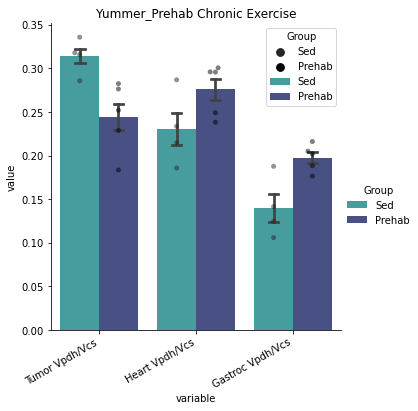

In [44]:
g = sns.catplot(data=yummer_prehab_vpdhcs_long, x='variable', y='value', hue='Group', kind='bar', hue_order=['Sed', 'Prehab'], ci=68, capsize=0.1, palette='mako_r').set(title='Yummer_Prehab Chronic Exercise')
sns.swarmplot(x="variable", y="value", hue='Group', hue_order=['Sed', 'Prehab'], data=yummer_prehab_vpdhcs_long, color="0", dodge=True, alpha=.5)
g.set_xticklabels(rotation=30, ha='right')

plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/obesity_studies/yummer_prehab_chronic_vpdh_cs.svg', dpi=300, bbox_inches='tight')

In [51]:
yummer_prehab_body = yummer_prehab[['Group', 'Plasma glucose (mg/dL)', 'Lean mass (g) wk 3 prior to surgery', 'Fat mass (g) week 3 prior to surgery','BW (g) at infusion study']]

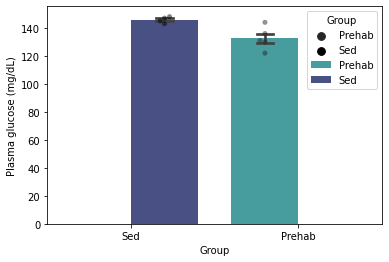

In [54]:
sns.barplot(data=yummer_prehab_body, x='Group', y='Plasma glucose (mg/dL)', hue='Group', ci=68, capsize=0.1, order=['Sed', 'Prehab'], palette='mako_r')
sns.swarmplot(x="Group", y="Plasma glucose (mg/dL)", hue='Group', data=yummer_prehab_body, order=['Sed', 'Prehab'],color="0", dodge=True, alpha=.5)
plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/obesity_studies/yummer_prehab_glucose.svg', dpi=300, bbox_inches='tight')

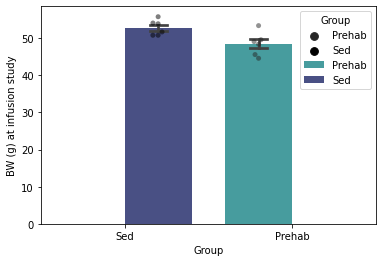

In [55]:
sns.barplot(data=yummer_prehab_body, x='Group', y='BW (g) at infusion study', hue='Group', ci=68, capsize=0.1, order=['Sed', 'Prehab'], palette='mako_r')
sns.swarmplot(x="Group", y="BW (g) at infusion study", hue='Group', data=yummer_prehab_body, order=['Sed', 'Prehab'],color="0", dodge=True, alpha=.5)
plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/obesity_studies/yummer_prehab_weight.svg', dpi=300, bbox_inches='tight')

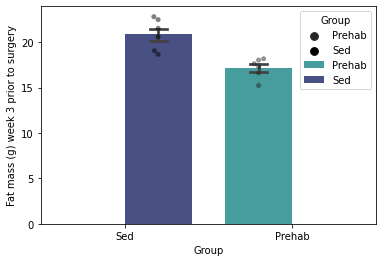

In [56]:
sns.barplot(data=yummer_prehab_body, x='Group', y='Fat mass (g) week 3 prior to surgery', hue='Group', ci=68, capsize=0.1, order=['Sed', 'Prehab'], palette='mako_r')
sns.swarmplot(x="Group", y="Fat mass (g) week 3 prior to surgery", hue='Group', data=yummer_prehab_body, order=['Sed', 'Prehab'],color="0", dodge=True, alpha=.5)
plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/obesity_studies/yummer_prehab_fat.svg', dpi=300, bbox_inches='tight')

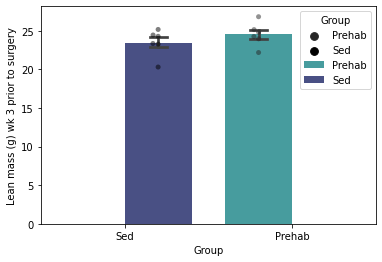

In [57]:
sns.barplot(data=yummer_prehab_body, x='Group', y='Lean mass (g) wk 3 prior to surgery', hue='Group', ci=68, capsize=0.1, order=['Sed', 'Prehab'], palette='mako_r')
sns.swarmplot(x="Group", y="Lean mass (g) wk 3 prior to surgery", hue='Group', data=yummer_prehab_body, order=['Sed', 'Prehab'],color="0", dodge=True, alpha=.5)
plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/obesity_studies/yummer_prehab_Lean.svg', dpi=300, bbox_inches='tight')

# yummer_rehab Study Analyses (5/5)

In [58]:
yummer_rehab

,Mouse#,Model,Group,Tumor m1 pyr,Tumor m2 pyr,Tumor m3 pyr,Tumor m1 lac,Tumor m2 lac,Tumor m3 lac,Tumor m1 ala,Tumor m2 ala,Tumor m3 ala,Tumor m1 glc,Tumor m2 glc,Tumor m3 glc,Tumor m4 glc,Tumor m5 glc,Tumor m6 glc,Tumor m5 glut,Tumor C4C5 m2 glut,Tumor Vpdh/Vcs,Tumor m3 pyr/m6 glc,Unnamed: 22,Heart m1 pyr,Heart m2 pyr,Heart m3 pyr,Heart m1 lac,Heart m2 lac,Heart m3 lac,Heart m1 ala,Heart m2 ala,Heart m3 ala,Heart m1 glc,Heart m2 glc,Heart m3 glc,Heart m4 glc,Heart m5 glc,Heart m6 glc,Heart m5 glut,Heart C4C5 m2 glut,Heart Vpdh/Vcs,Heart m3 pyr/m6 glc,Unnamed: 42,Gastroc m1 pyr,Gastroc m2 pyr,Gastroc m3 pyr,Gastroc m1 lac,Gastroc m2 lac,Gastroc m3 lac,Gastroc m1 ala,Gastroc m2 ala,Gastroc m3 ala,Gastroc m1 glc,Gastroc m2 glc,Gastroc m3 glc,Gastroc m4 glc,Gastroc m5 glc,Gastroc m6 glc,Gastroc m5 glut,Gastroc C4C5 m2 glut,Gastroc Vpdh/Vcs,Gastroc m3 pyr/m6 glc,Unnamed: 62,WAT m1 pyr,WAT m2 pyr,WAT m3 pyr,WAT m1 lac,WAT m2 lac,WAT m3 lac,WAT m1 ala,WAT m2 ala,WAT m3 ala,WAT m1 glc,WAT m2 glc,WAT m3 glc,WAT m4 glc,WAT m5 glc,WAT m6 glc,WAT m5 glut,WAT C4C5 m2 glut,WAT Vpdh/Vcs,WAT m3 pyr/m6 glc,Unnamed: 82,Wk 0 tumor volume (mm3),Wk 1 tumor volume (mm3),Wk 2 tumor volume (mm3),Wk 3 tumor volume (mm3),Wk 4 tumor volume (mm3),Unnamed: 88,Tumor glc uptake (nmol/g/min),Tumor glc uptake (nmol/min),Gastroc glc uptake (nmol/g/min),Heart glc uptake (nmol/g/min),WAT glc uptake (nmol/g/min),Leukocyte glc uptake (nmol/10^5 cells/min),Plasma glucose (mg/dL),Plasma insulin (uU/mL),Lean mass (g) wk 3 prior to surgery,Fat mass (g) week 3 prior to surgery,BW (g) at infusion study
22,13,YUMMER,Sed,2.75,3.31,4.10,2.52,2.54,3.56,2.39,2.68,3.21,2.73,1.82,4.41,2.16,2.06,10.32,3.82,1.46,0.356098,0.397287,NaN,0.97,1.24,1.56,0.95,1.36,0.84,0.88,1.14,0.92,3.30,3.20,7.69,1.98,2.83,15.01,1.53,0.29,0.185897,0.103931,NaN,1.20,0.98,2.22,0.86,0.74,1.96,0.84,0.78,1.44,1.09,1.76,5.54,2.89,0.83,14.40,2.24,0.29,0.130631,0.154167,NaN,0.32,0.54,0.69,0.35,0.41,0.56,0.35,0.42,0.52,2.24,1.54,3.84,2.67,1.49,NaN,0.52,0.13,0.188406,NaN,NaN,0.0,4.186667,143.720400,448.6929,2571.1370,NaN,101.3,145.46950,108.4,52.5,18.5,34.9,143.0,25.6,NaN,NaN,41.5
23,14,YUMMER,Rehab,0.42,0.96,2.07,0.31,0.88,1.93,0.30,0.91,1.86,2.72,2.13,2.72,0.73,2.49,5.88,1.46,0.53,0.256039,0.352041,NaN,1.45,1.64,2.27,1.48,1.32,1.87,1.45,1.28,1.82,2.76,2.17,5.22,2.42,2.00,15.79,1.41,0.46,0.202643,0.143762,NaN,1.35,1.64,1.96,1.29,1.43,1.72,1.16,1.51,1.75,3.82,2.38,3.29,2.28,0.60,8.57,1.66,0.44,0.224490,0.228705,NaN,0.41,0.46,0.91,0.44,0.36,0.61,0.38,0.38,0.68,1.49,1.72,1.72,2.26,2.29,NaN,0.31,0.16,0.175824,NaN,NaN,0.0,0.000000,14.130000,523.3333,1149.7630,NaN,98.2,112.90670,135.4,72.6,15.0,44.2,146.0,18.3,NaN,NaN,38.7
24,15,YUMMER,Sed,0.86,1.04,3.09,0.75,0.90,2.65,0.76,0.82,2.71,3.11,2.85,3.67,1.51,1.39,8.64,2.29,1.18,0.381877,0.357639,NaN,1.17,1.46,2.71,1.23,1.51,1.56,1.07,1.36,1.62,3.66,2.82,10.17,1.99,2.01,23.02,1.82,0.61,0.225092,0.117724,NaN,0.67,0.86,1.25,0.52,0.71,0.86,0.45,0.79,0.81,1.83,3.49,2.56,1.68,0.58,5.60,1.18,0.23,0.184000,0.223214,NaN,0.38,0.29,0.57,0.41,0.22,0.52,0.36,0.22,0.48,3.45,2.82,1.65,0.60,2.54,NaN,0.16,0.10,0.175439,NaN,NaN,0.0,0.000000,143.720400,605.8238,1436.0270,NaN,144.8,231.02070,110.7,52.6,17.1,36.8,151.0,28.1,NaN,NaN,43.6
25,16,YUMMER,Rehab,1.29,1.51,2.60,1.14,1.25,2.26,0.96,1.21,2.18,2.65,2.69,4.78,2.52,1.17,9.05,2.60,0.62,0.238462,0.287293,NaN,2.28,3.25,4.11,2.55,2.47,3.76,2.42,2.42,3.81,1.23,1.95,10.83,1.61,2.07,22.10,2.51,0.88,0.214112,0.185973,NaN,0.92,0.98,1.47,0.88,0.82,1.19,0.73,0.83,1.26,1.67,3.29,2.36,1.70,1.40,4.65,2.56,0.38,0.258503,0.316129,NaN,0.52,0.31,0.91,0.53,0.25,0.67,0.49,0.24,0.72,3.65,3.26,1.58,0.76,1.98,NaN,0.39,0.13,0.142857,NaN,NaN,0.0,0.000000,47.688750,448.6929,1436.0270,NaN,101.6,145.90030,136.0,88.3,16.7,46.8,132.0,10.2,NaN,NaN,39.1
26,17,YUMMER,Sed,0.84,2.16,3.32,0.59,1.85,2.85,0.57,1.76,2.89,3.72,2.58,4.22,1.57,1.25,10.49,3.04,1.05,0.316265,0.316492,NaN,2.46,2.97,4.31,2.61,2.83,3.81,2.62,2.88,3.96,3.84,3.74,13.97,1.71,1.24,30.94,2.33,1.02,0.23

In [59]:
yummer_rehab_tumors = yummer_rehab[['Group', 'Wk 0 tumor volume (mm3)', 'Wk 1 tumor volume (mm3)', 'Wk 2 tumor volume (mm3)', 'Wk 3 tumor volume (mm3)', 'Wk 4 tumor volume (mm3)']]
yummer_rehab_tumors_long = yummer_rehab_tumors.melt(id_vars='Group')

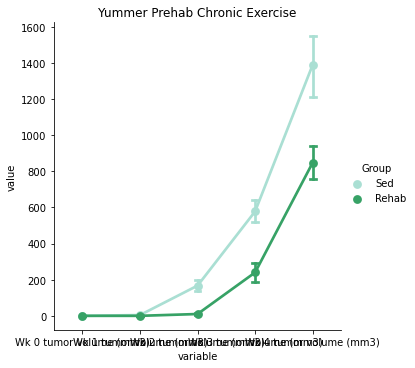

In [71]:
sns.catplot(data=yummer_rehab_tumors_long, x='variable', y='value', hue='Group', ci=68, palette='BuGn', kind="point", capsize=0.1).set(title='Yummer Rehab Chronic Exercise')
plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/obesity_studies/yummer_rehab_tumorcurve.svg', bbox_inches='tight', dpi=300)

In [72]:
yummer_rehab_dg = yummer_rehab[['Group', 'Tumor glc uptake (nmol/g/min)', 'Gastroc glc uptake (nmol/g/min)', 'Heart glc uptake (nmol/g/min)', 'WAT glc uptake (nmol/g/min)']]
yummer_rehab_dg_long = yummer_rehab_dg.melt(id_vars='Group')

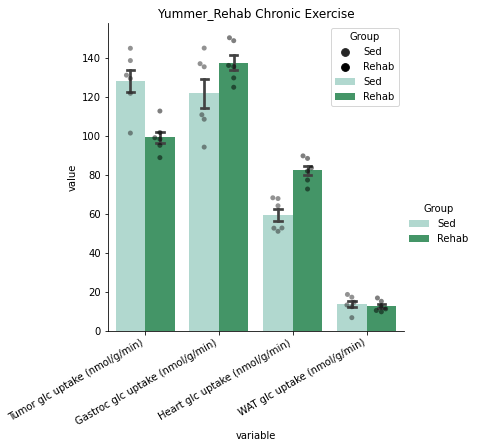

In [74]:
g = sns.catplot(data=yummer_rehab_dg_long, x='variable', y='value', hue='Group', kind='bar', hue_order=['Sed', 'Rehab'], ci=68, capsize=0.1, palette='BuGn').set(title='Yummer_Rehab Chronic Exercise')
sns.swarmplot(x="variable", y="value", hue='Group', hue_order=['Sed', 'Rehab'], data=yummer_rehab_dg_long, color="0", dodge=True, alpha=.5)
g.set_xticklabels(rotation=30, ha='right')

plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/obesity_studies/yummer_Rehab_chronic_2dg.svg', dpi=300, bbox_inches='tight')

In [75]:
yummer_rehab_vpdhcs = yummer_rehab[['Group', 'Tumor Vpdh/Vcs', 'Heart Vpdh/Vcs', 'Gastroc Vpdh/Vcs']]
yummer_rehab_vpdhcs_long = yummer_rehab_vpdhcs.melt(id_vars='Group')

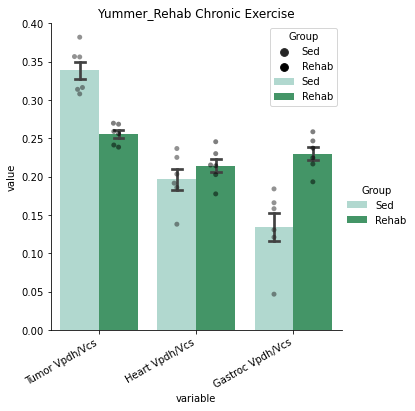

In [76]:
g = sns.catplot(data=yummer_rehab_vpdhcs_long, x='variable', y='value', hue='Group', kind='bar', hue_order=['Sed', 'Rehab'], ci=68, capsize=0.1, palette='BuGn').set(title='Yummer_Rehab Chronic Exercise')
sns.swarmplot(x="variable", y="value", hue='Group', hue_order=['Sed', 'Rehab'], data=yummer_rehab_vpdhcs_long, color="0", dodge=True, alpha=.5)
g.set_xticklabels(rotation=30, ha='right')

plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/obesity_studies/yummer_Rehab_chronic_vpdhcs.svg', dpi=300, bbox_inches='tight')

In [78]:
yummer_rehab_body = yummer_rehab[['Group', 'Plasma glucose (mg/dL)','BW (g) at infusion study', 'Plasma insulin (uU/mL)']]

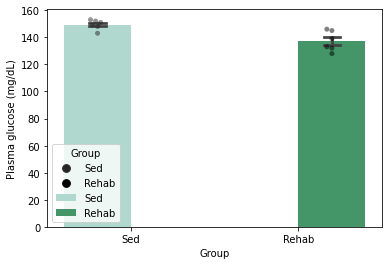

In [81]:
sns.barplot(data=yummer_rehab_body, x='Group', y='Plasma glucose (mg/dL)', hue='Group', ci=68, capsize=0.1, order=['Sed', 'Rehab'], palette='BuGn')
sns.swarmplot(x="Group", y="Plasma glucose (mg/dL)", hue='Group', data=yummer_rehab_body, order=['Sed', 'Rehab'],color="0", dodge=True, alpha=.5)
plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/obesity_studies/yummer_rehab_glucose.svg', dpi=300, bbox_inches='tight')

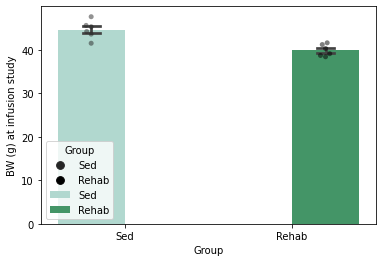

In [83]:
sns.barplot(data=yummer_rehab_body, x='Group', y='BW (g) at infusion study', hue='Group', ci=68, capsize=0.1, order=['Sed', 'Rehab'], palette='BuGn')
sns.swarmplot(x="Group", y='BW (g) at infusion study', hue='Group', data=yummer_rehab_body, order=['Sed', 'Rehab'],color="0", dodge=True, alpha=.5)
plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/obesity_studies/yummer_rehab_weight.svg', dpi=300, bbox_inches='tight')

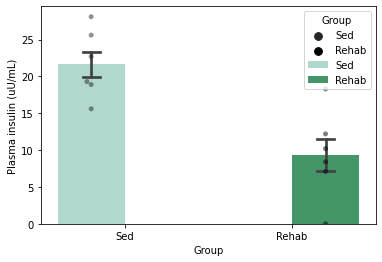

In [84]:
sns.barplot(data=yummer_rehab_body, x='Group', y='Plasma insulin (uU/mL)', hue='Group', ci=68, capsize=0.1, order=['Sed', 'Rehab'], palette='BuGn')
sns.swarmplot(x="Group", y='Plasma insulin (uU/mL)', hue='Group', data=yummer_rehab_body, order=['Sed', 'Rehab'],color="0", dodge=True, alpha=.5)
plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/obesity_studies/yummer_rehab_insulin.svg', dpi=300, bbox_inches='tight')